
# Text Analytics Group Assignment 3


Nicole Erich, Vishwa Bhuta, Caroline Nelson, Erik Honore, Lindsay Tober

---

In [4]:
# Import Statements - Basic
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

# Import Statements - Product Comparison Network
import networkx as nx
import plotly.plotly as py
from plotly.graph_objs import *
import matplotlib.pyplot as plt
import pylab
from pylab import rcParams
import re
import math

# Import Statements - Other
import string
import os
import csv

# # BELOW IMPORT STATEMENTS MAY BE N/A - ADD BACK IN IF NEEDED

# # Import Statements - nltk
# import nltk
# from nltk.corpus import stopwords
# from nltk import word_tokenize
# from nltk import collocations
# from nltk import sentiment
# from nltk.stem import WordNetLemmatizer
# from nltk.chunk.regexp import *

# # # Just in case
# # nltk.download()

# # Import Statements - sklearn
# from sklearn.cross_validation import train_test_split
# from sklearn import linear_model
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn import metrics
# from sklearn.metrics import classification_report
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer

# # Import Statements - PMI calculations
# from math import log
# from decimal import Decimal
# from collections import defaultdict
# from django.utils.encoding import smart_str, smart_unicode

# # Import Statements - Modeling & Other
# from patsy import dmatrices
# import scipy
# from scipy import sparse
# from scipy.sparse import coo_matrix, hstack
# from collections import Counter
# from operator import itemgetter
# import random
# import functools32




# Import Statements - Warnings
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [43]:
data=pd.read_csv('Assignment 3 Sentiment Scores.csv')
posts=pd.read_csv('Assignment 3 Edmunds Posts.csv')

---
# Task A.

### The sentiment scores worksheet in the data file “Assignment 3 Sentiment Scores.csv” (on Canvas) provides sentiment scores (+5 to -5) of forum users on 10 car models. Each row represents a post (not shown) that can mention multiple models. Only positive and negative sentiments are noted. 
### From these sentiment scores, create a directed product comparison network (and use NodeXL or, even better, write your own code in Python using networkx or R). Use the principles laid out in the article “Product comparison networks” to answer this question. 


---



In [3]:
# View columns in the data set to understand different car models
data.columns.values

array(['ES', 'LS', 'RX', 'A8', 'A6', '3series', '5series', '7series', 'XJ',
       'Sclass'], dtype=object)

In [14]:
# FYI - for later reference
# We will classify the models by make
#  Source: http://www.kbb.com/
#  (1) Lexus - ES, LS, RX
#  (2) Audi - A8, A6
#  (3) BMW - 3series, 5series, 7series
#  (4) Jaguar - XJ
#  (5) Mercedes-Benz - Sclass

# Create a dictionary of car makes, using numbers to represent names
carmodels = data.columns.tolist()
carmakes_list = [1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,4.0,5.0]
carmakes_dict = dict(zip(carmodels, carmakes_list))

# # View resulting dictionary
# carmakes_dict

In [5]:
### FIRST
### We need to calculate the difference in sentiments between products across all reviews


# Create new columns in 'data' dataframe to capture difference in each product pairing 'edge'
# Note that there are no repeats (i.e., only a-b, not a-b and b-a)

# ES
data['ES-LS'] = data['ES'] - data['LS']
data['ES-RX'] = data['ES'] - data['RX']
data['ES-A8'] = data['ES'] - data['A8']
data['ES-A6'] = data['ES'] - data['A6']
data['ES-3series'] = data['ES'] - data['3series']
data['ES-5series'] = data['ES'] - data['5series']
data['ES-7series'] = data['ES'] - data['7series']
data['ES-XJ'] = data['ES'] - data['XJ']
data['ES-Sclass'] = data['ES'] - data['Sclass']

# LS
data['LS-RX'] = data['LS'] - data['RX']
data['LS-A8'] = data['LS'] - data['A8']
data['LS-A6'] = data['LS'] - data['A6']
data['LS-3series'] = data['LS'] - data['3series']
data['LS-5series'] = data['LS'] - data['5series']
data['LS-7series'] = data['LS'] - data['7series']
data['LS-XJ'] = data['LS'] - data['XJ']
data['LS-Sclass'] = data['LS'] - data['Sclass']

# RX
data['RX-A8'] = data['RX'] - data['A8']
data['RX-A6'] = data['RX'] - data['A6']
data['RX-3series'] = data['RX'] - data['3series']
data['RX-5series'] = data['RX'] - data['5series']
data['RX-7series'] = data['RX'] - data['7series']
data['RX-XJ'] = data['RX'] - data['XJ']
data['RX-Sclass'] = data['RX'] - data['Sclass']

# A8
data['A8-A6'] = data['A8'] - data['A6']
data['A8-3series'] = data['A8'] - data['3series']
data['A8-5series'] = data['A8'] - data['5series']
data['A8-7series'] = data['A8'] - data['7series']
data['A8-XJ'] = data['A8'] - data['XJ']
data['A8-Sclass'] = data['A8'] - data['Sclass']

# A6
data['A6-3series'] = data['A6'] - data['3series']
data['A6-5series'] = data['A6'] - data['5series']
data['A6-7series'] = data['A6'] - data['7series']
data['A6-XJ'] = data['A6'] - data['XJ']
data['A6-Sclass'] = data['A6'] - data['Sclass']

# 3series
data['3series-5series'] = data['3series'] - data['5series']
data['3series-7series'] = data['3series'] - data['7series']
data['3series-XJ'] = data['3series'] - data['XJ']
data['3series-Sclass'] = data['3series'] - data['Sclass']

# 5series
data['5series-7series'] = data['5series'] - data['7series']
data['5series-XJ'] = data['5series'] - data['XJ']
data['5series-Sclass'] = data['5series'] - data['Sclass']

# 7series
data['7series-XJ'] = data['7series'] - data['XJ']
data['7series-Sclass'] = data['7series'] - data['Sclass']

# XJ
data['XJ-Sclass'] = data['XJ'] - data['Sclass']



# # View the new columns in our 'data' dataframe
# data.columns.values

In [6]:
# Fill NaN values with 0's
data = data.fillna(0)

In [7]:
# Get aggregate scores by product pairing edge
datascores = np.sum(data.ix[:,10:],axis=0)

In [8]:
# Turn series of scores into a dataframe
datascores_df = pd.DataFrame({'productpair':datascores.index, 'score':datascores.values})

In [9]:
### SECOND
### We need to re-orient the direction of the edges and get weighted scores


# Create new column to count non-zero product comparison
# Note: this will be used to calculate weighted scores for edges
datascores_df['n_nonzero'] = 0

# Function to:
#   1. Correct direction of pairings and 
#   2. Calculate nonzeros to get number of reviews that mention both models with associated sentiment
# Inputs: product pair and score
# Outputs: UPDATED datascores_df dataframe (not shown automatically)
def NodePairingCalculations(pp,s):
    for i in range(len(s)):
        if s[i]<0:                                # if pair is negative
            pp_split = pp[i].split('-')           # split car models in pairing
            pp[i] = pp_split[1]+'-'+pp_split[0]   # re-combine car models in reverse order
            s[i] = abs(s[i])                      # take absolute value of score to make positive node
        datascores_df['n_nonzero'][i] = np.count_nonzero(data.ix[:,i+10],axis=0)  # add count of 'differences' for pairing
            
# Apply function to product pairs and scores
NodePairingCalculations(datascores_df['productpair'],datascores_df['score'])

# # View resulting dataframe
# datascores_df

In [10]:
# Calculate weighted score in new column
datascores_df['weightedscore'] = (datascores_df['score'] / datascores_df['n_nonzero']).fillna(0)

# # View final resulting dataframe
# datascores_df

In [11]:
### THIRD
### We need to prepare the input data for creating the PCN chart


# Function to get tuples for drawing weighted edge
# Inputs: product pair and weighted score
# Outputs: list of tuples of (node2, node1, weight) for edges
def GetWeightedEdgeTuples(pp,ws):
    weightededges = []
    for i in range(len(pp)):
        if ws[i]>0:
            n1 = pp[i].split('-')[0]
            n2 = pp[i].split('-')[1]
            ew = round(ws[i],2)
            weightededges.append((n2,n1,ew))
    return weightededges

# Apply function to product pairs and weighted scores
weightededge_list = GetWeightedEdgeTuples(datascores_df['productpair'],datascores_df['weightedscore'])

# # View output list of tuples
# weightededge_list

In [12]:
# Get list of car models for PCN nodes
nodes_list = data.columns[:10].tolist()

# # View nodes
# nodes_list

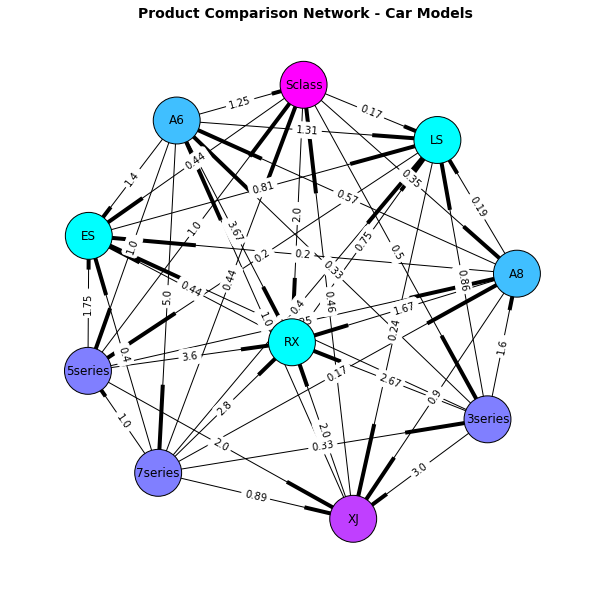

In [17]:
### FOURTH
### We need to create the PCN model using networkx

# Establish directed graph, pulling in nodes and weighed edges
G = nx.DiGraph()
G.add_nodes_from(nodes_list)
G.add_weighted_edges_from(weightededge_list)

# Create layout
pos=nx.spring_layout(G,scale=7,k=.9)

# Draw nodes
val_map = carmakes_dict
values = [val_map.get(node, 0.5) for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=2200, cmap=plt.get_cmap('cool'), node_color = values)

# Draw edges
edge_colours = ['black' for edge in G.edges()]
black_edges = [edge for edge in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=True)

# Draw edge labels
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

# Draw node labels
node_labels = {node:node for node in G.nodes()} 
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Add title
pylab.title('Product Comparison Network - Car Models',size=14,weight='bold')

# Prep for display
pylab.axis('off')
pylab.rcParams['figure.figsize'] = 10, 10
pylab.show()

---
# Task B. 
### Calculate both unweighted and weighted PageRank scores for each car. Note that NodeXL can’t calculate weighted PageRank scores. What are the correlations between these metrics and sales figures shown below? What additional information do weighted PageRanks capture? Use a python script to calculate weighted PageRanks. Unweighted PageRanks can be calculated in NodeXL, or you can write a python script for that task as well.  
---

In [36]:
pr_weighted=nx.pagerank(G, alpha=0.5, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

values_w=sorted(pr_weighted.values())
print pr_weighted
values_w

{'XJ': 0.12680544764499518, 'Sclass': 0.06902817930532767, '7series': 0.06365237757480413, 'RX': 0.1709213455855748, 'LS': 0.16927602080872228, 'A6': 0.07443369142113902, 'A8': 0.06483396049654351, '3series': 0.05662092558840632, 'ES': 0.1082754183789859, '5series': 0.09615263319550121}


[0.05662092558840632,
 0.06365237757480413,
 0.06483396049654351,
 0.06902817930532767,
 0.07443369142113902,
 0.09615263319550121,
 0.1082754183789859,
 0.12680544764499518,
 0.16927602080872228,
 0.1709213455855748]

In [42]:
pr_unweighted=nx.pagerank(G, alpha=0.5, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight=None, dangling=None)
values_uw=sorted(pr_unweighted.values())

In [37]:
Sales_vect=[220,14,12,25,20,60,135,6.6,30,120]
#line up sorted weighted values with make

import numpy
print numpy.corrcoef(Sales_vect,values_w)

[[ 1.         -0.00390592]
 [-0.00390592  1.        ]]


In [39]:
Sales_vect2=[14,220,12,20,25,60,120,6.6,135,30] #line up with sorted unweighted values by make
print numpy.corrcoef(Sales_vect2,values_uw)

[[ 1.         -0.12900881]
 [-0.12900881  1.        ]]


Weighted pagerank considers the margin of how much each is preferred.  The negative correlations show that there are generally fewer sales of more expensive cars; the nicer car may be given a higher sentiment score, but choosing to buy it would depend on the price.  A person may prefer nicer cars in theory, but will likely choose the affordable option.  Unweighted pagerank strictly looks at if they are preferred or not.  From these correlations, we can see that people may have ranked nicer cars much higher compared to the cars they decided to buy.  (Feel free to edit this if it doesn't make sense lol)

In [ ]:
import networkx as nx D=nx.DiGraph()
allModels = [  ['ES', 'LS', value ], ['RX', 'LS', value ], [Etc. ], ] 
# allNewModels = [] 
# allNewModels.append([]) 
# allNewModels.append([]) 
# # for item in allModels: 
#   allNewModels[0].append(item[1]) 
#   allNewModels[1].append(item[0]) 
#   allNewModels[2].append(item[2]) 
D.add_weighted_edges_from(allModels) print nx.pagerank(D)

---
# Task C.
### The above sentiment scores above were obtained by manually reading each post.  The file “Assignment 3 Edmunds Posts.xlsx” provide a bunch of actual messages (combine the worksheets). Your task is to automate the sentiment extraction from each post.  As in tasks A and B, focus on the same 10 models (note that other models may also be mentioned, but that they should be ignored).     
### Write one or more python or R script(s) to generate sentiment scores for the 10 models just as in the sentiment scores worksheet.  This will be an unsupervised approach. One possibility (but not the only one) is to take the dictionary of SentiStrength (along with the default sentiment scores) and use it as inputs in your script(s). Your script should consider lemmatization (e.g., liking and liked must be treated as the same). 
### Generate sentiment scores with your script(s), find weighted PageRank of each of the 10 cars and correlate with the sales figures above. How does the correlation of this automated approach compare with that of manual scoring in task B?

---

In [44]:
posts[:10]

,Posts
0,"""As a Mercedes fan, I was sad, but I knew that..."
1,"""By the way the new GS, next lsand new $150K s..."
2,"""Come now, does anyone really believe that wha..."
3,"The success of the LexusES does prove that, at..."
4,Which still didn't amount to beating their com...
5,..but I wonder how many employees are secure e...
6,"""Do you think that if Mercedes went back to th..."
7,"""How 'bout Jaguar, Phaeton, Acura, Ferrari, AM..."
8,"""I don't understand what Audi is going to do y..."
9,"""I'll bet most critics of an LexusLS have neve..."


In [45]:
data[:10]

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0
5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.0,4.0,3.0
6,NaN,2.0,NaN,3.0,NaN,NaN,NaN,4.0,-1.0,3.0
7,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.0,4.0,2.0
8,NaN,2.0,NaN,4.0,3.0,-2.0,NaN,NaN,NaN,3.0
9,NaN,4.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0


In [47]:
posts.merge(data, left_index=True, right_index=True)

,Posts,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,"""As a Mercedes fan, I was sad, but I knew that...",NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,"""By the way the new GS, next lsand new $150K s...",NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,"""Come now, does anyone really believe that wha...",NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,"The success of the LexusES does prove that, at...",NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,Which still didn't amount to beating their com...,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0
5,..but I wonder how many employees are secure e...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.0,4.0,3.0
6,"""Do you think that if Mercedes went back to th...",NaN,2.0,NaN,3.0,NaN,NaN,NaN,4.0,-1.0,3.0
7,"""How 'bout Jaguar, Phaeton, Acura, Ferrari, AM...",NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.0,4.0,2.0
8,"""I don't understand what Audi is going to do y...",NaN,2.0,NaN,4.0,3.0,-2.0,NaN,NaN,NaN,3.0
9,"""I'll bet most critics of an LexusLS have neve...",NaN,4.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0
